In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

In [3]:
# Load the dataset
df = pd.read_csv("global air pollution dataset.csv")

In [4]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [6]:
df.shape

(23463, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [8]:
# summary statistics
df.describe(include='all')

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
count,23036,23462,23463.000000,23463,23463.000000,23463,23463.000000,23463,23463.000000,23463,23463.000000,23463
unique,175,23462,NaN,6,NaN,3,NaN,5,NaN,2,NaN,6
top,United States of America,Praskoveya,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,Good
freq,2872,1,NaN,9936,NaN,23460,NaN,21069,NaN,23448,NaN,10208
mean,NaN,NaN,72.010868,NaN,1.368367,NaN,35.193709,NaN,3.063334,NaN,68.519755,NaN
std,NaN,NaN,56.055220,NaN,1.832064,NaN,28.098723,NaN,5.254108,NaN,54.796443,NaN
min,NaN,NaN,6.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,39.000000,NaN,1.000000,NaN,21.000000,NaN,0.000000,NaN,35.000000,NaN
50%,NaN,NaN,55.000000,NaN,1.000000,NaN,31.000000,NaN,1.000000,NaN,54.000000,NaN
75%,NaN,NaN,79.000000,NaN,1.000000,NaN,40.000000,NaN,4.000000,NaN,79.000000,NaN


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [11]:
# Handle missing values - we'll fill with median for numerical, mode for categorical
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Betty Njuguna\AppData\Local\Temp\ipykernel_13112\2458572293.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Betty Njuguna\AppData\Local\Temp\ipykernel_13112\2458572293.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [12]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [13]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [14]:
df.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate


In [15]:
# Convert categorical AQI values to numerical (we'll create a mapping)
aqi_category_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Unhealthy for Sensitive Groups': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4,
    'Hazardous': 5
}

In [16]:
# Apply mapping to all category columns
category_columns = [col for col in df.columns if 'Category' in col]
for col in category_columns:
    df[col+'_encoded'] = df[col].map(aqi_category_mapping)

In [17]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,AQI Category_encoded,CO AQI Category_encoded,Ozone AQI Category_encoded,NO2 AQI Category_encoded,PM2.5 AQI Category_encoded
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,1,0,0,0,1
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0,0,0,0,0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,1,0,0,0,1
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0,0,0,0,0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0,0,0,0,0


In [18]:
df = df.drop(columns=category_columns)

In [19]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_encoded,CO AQI Category_encoded,Ozone AQI Category_encoded,NO2 AQI Category_encoded,PM2.5 AQI Category_encoded
0,Russian Federation,Praskoveya,51,1,36,0,51,1,0,0,0,1
1,Brazil,Presidente Dutra,41,1,5,1,41,0,0,0,0,0
2,Italy,Priolo Gargallo,66,1,39,2,66,1,0,0,0,1
3,Poland,Przasnysz,34,1,34,0,20,0,0,0,0,0
4,France,Punaauia,22,0,22,0,6,0,0,0,0,0


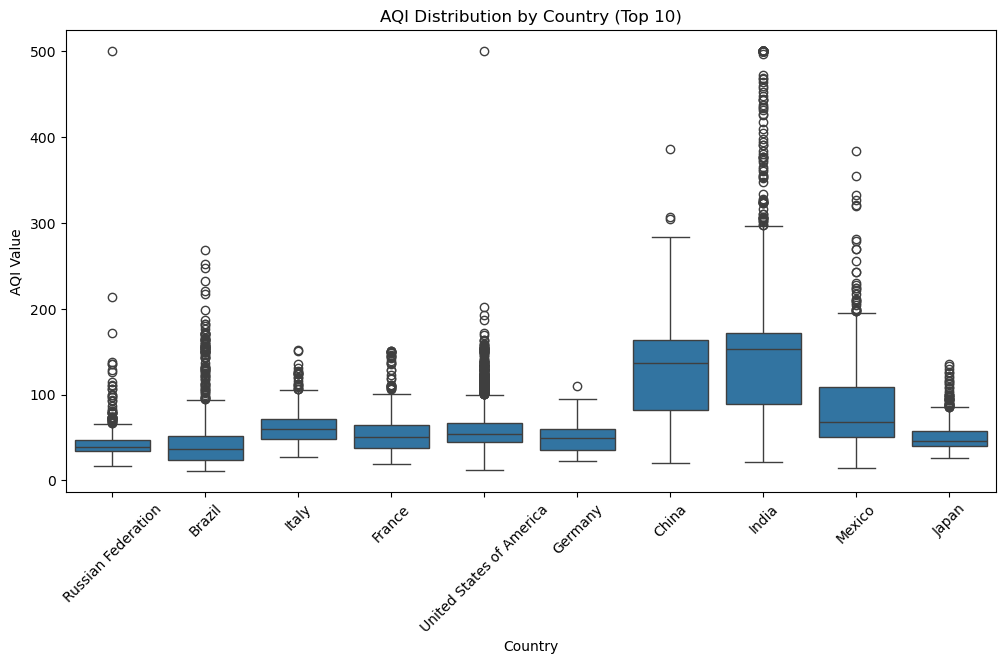

In [23]:
# AQI by country (top 10)
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Country'].isin(top_countries)], 
            x='Country', y='AQI Value')
plt.title('AQI Distribution by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

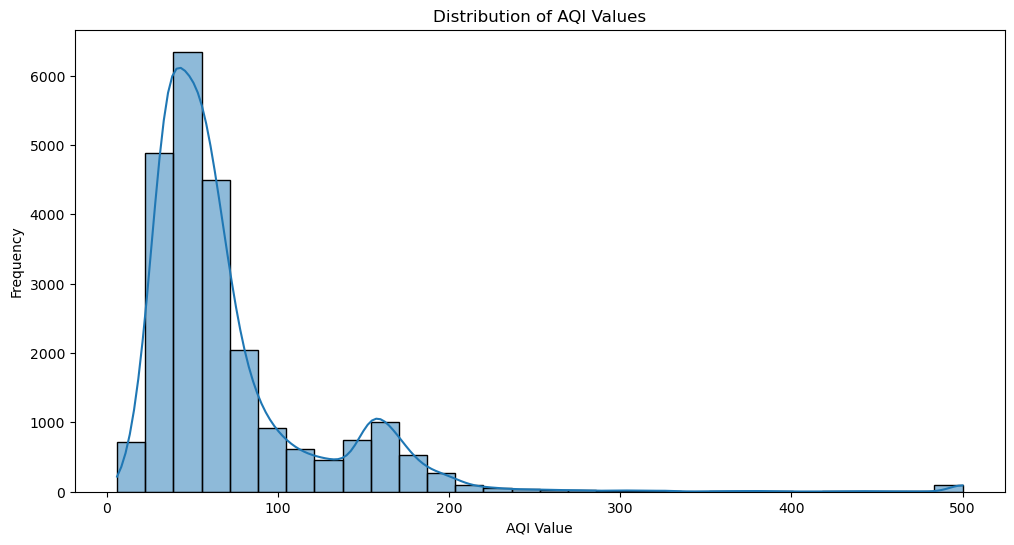

In [21]:
# 1. Distribution of AQI values
plt.figure(figsize=(12, 6))
sns.histplot(df['AQI Value'], bins=30, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

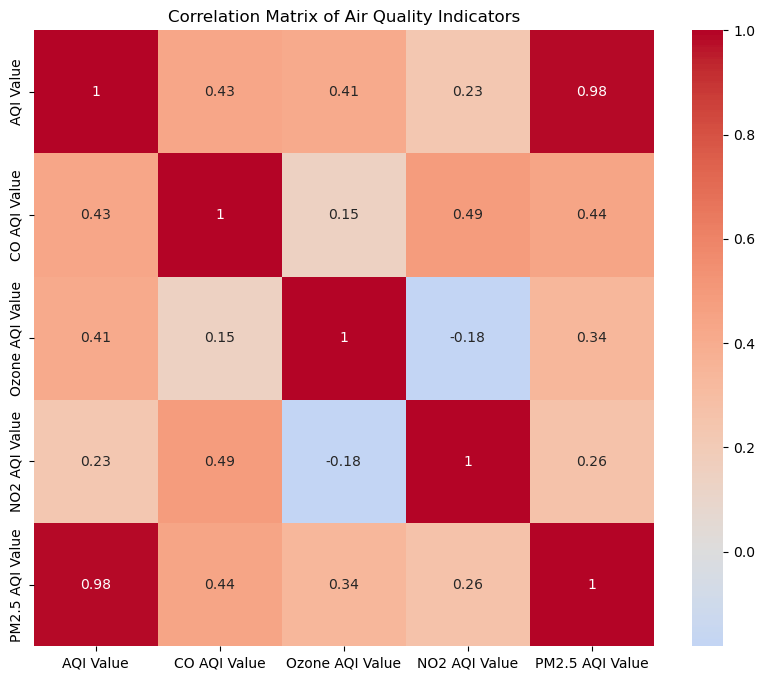

In [24]:
# 3. Correlation matrix
numerical_cols = [col for col in df.columns if 'Value' in col]
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Air Quality Indicators')
plt.show()

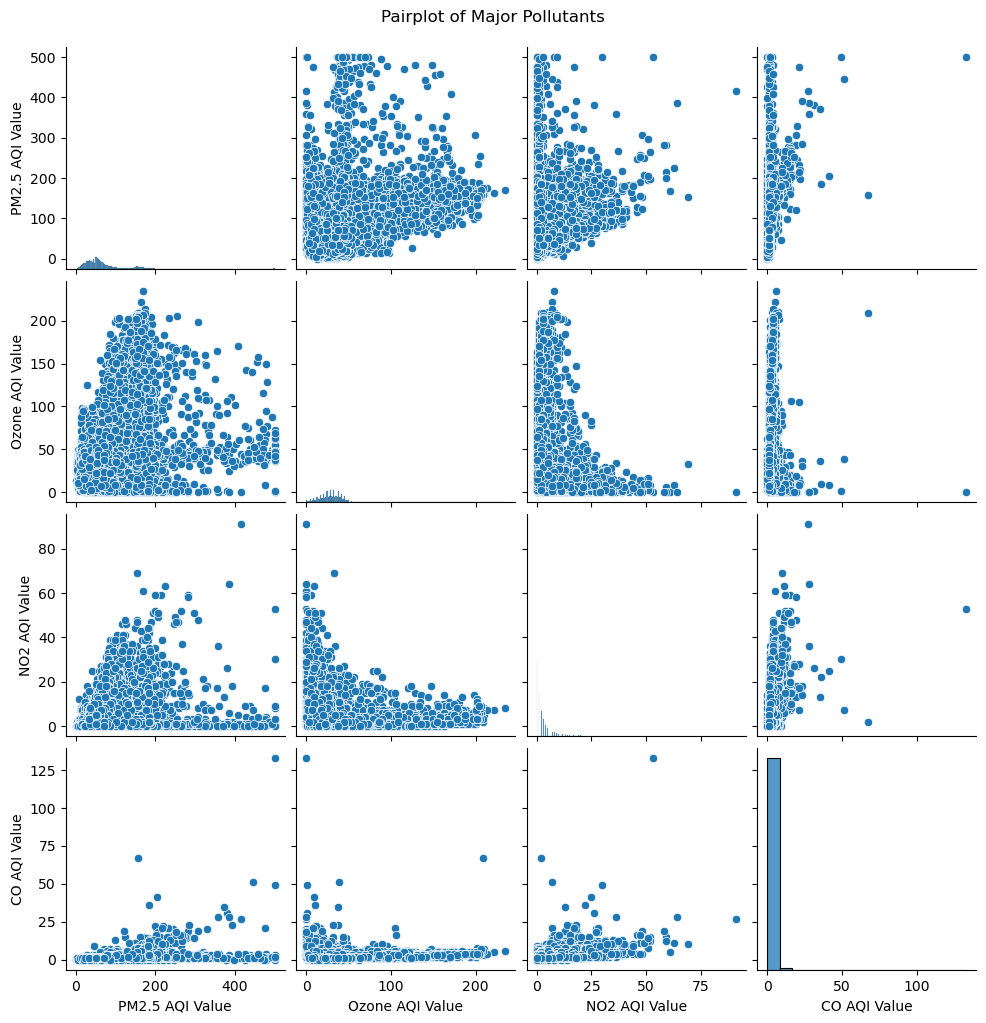

In [25]:
# 4. Pairplot of main pollutants
sns.pairplot(df[['PM2.5 AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'CO AQI Value']])
plt.suptitle('Pairplot of Major Pollutants', y=1.02)
plt.show()

## Step 4: Feature Engineering and Outlier Treatment

In [26]:
# Calculate total pollution score (weighted sum)
df['Total_Pollution_Score'] = (0.3 * df['PM2.5 AQI Value'] + 
                              0.25 * df['Ozone AQI Value'] + 
                              0.25 * df['NO2 AQI Value'] + 
                              0.2 * df['CO AQI Value'])

In [27]:
df['Total_Pollution_Score']

0        24.50
1        14.00
2        30.25
3        14.70
4         7.30
         ...  
23458    94.80
23459    21.45
23460    20.95
23461    33.00
23462    30.70
Name: Total_Pollution_Score, Length: 23463, dtype: float64

In [28]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_encoded,CO AQI Category_encoded,Ozone AQI Category_encoded,NO2 AQI Category_encoded,PM2.5 AQI Category_encoded,Total_Pollution_Score
0,Russian Federation,Praskoveya,51,1,36,0,51,1,0,0,0,1,24.50
1,Brazil,Presidente Dutra,41,1,5,1,41,0,0,0,0,0,14.00
2,Italy,Priolo Gargallo,66,1,39,2,66,1,0,0,0,1,30.25
3,Poland,Przasnysz,34,1,34,0,20,0,0,0,0,0,14.70
4,France,Punaauia,22,0,22,0,6,0,0,0,0,0,7.30


In [37]:
# Outlier detection and treatment using IQR
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [39]:
# Apply to all numerical columns
numerical_cols = [col for col in df.columns if 'Value' in col]
for col in numerical_cols:
    df = treat_outliers(df, col)

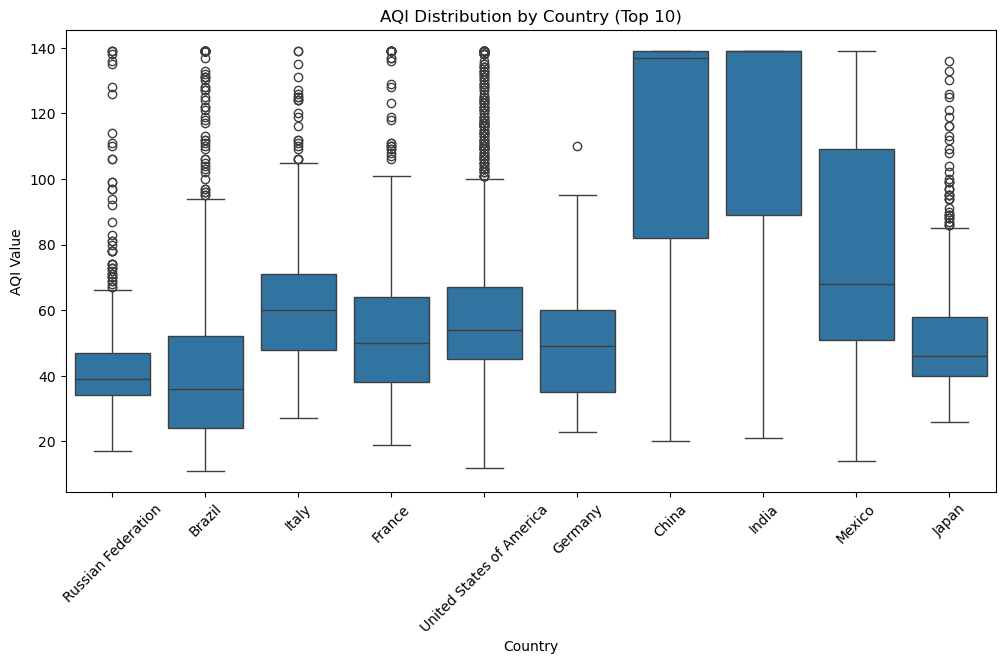

In [40]:
# AQI by country (top 10)
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Country'].isin(top_countries)], 
            x='Country', y='AQI Value')
plt.title('AQI Distribution by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Encode categorical variables (Country and City)
label_encoders = {}
categorical_cols = ['Country', 'City']

for col in categorical_cols:
    le = LabelEncoder()
    df[col+'_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

In [42]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_encoded,CO AQI Category_encoded,Ozone AQI Category_encoded,NO2 AQI Category_encoded,PM2.5 AQI Category_encoded,Total_Pollution_Score,Country_encoded,City_encoded
0,Russian Federation,Praskoveya,51.0,1.0,36.0,0.0,51.0,1,0,0,0,1,24.50,130,16525
1,Brazil,Presidente Dutra,41.0,1.0,5.0,1.0,41.0,0,0,0,0,0,14.00,22,16546
2,Italy,Priolo Gargallo,66.0,1.0,39.0,2.0,66.0,1,0,0,0,1,30.25,75,16582
3,Poland,Przasnysz,34.0,1.0,34.0,0.0,20.0,0,0,0,0,0,14.70,123,16618
4,France,Punaauia,22.0,1.0,22.0,0.0,6.0,0,0,0,0,0,7.30,54,16699


## Step 5: Prepare Data for Modeling

In [43]:
# Define features and target
features = ['PM2.5 AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'CO AQI Value',
            'Country_encoded', 'City_encoded', 'Total_Pollution_Score']
target = 'AQI Value'

X = df[features]
y = df[target]


In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (18770, 7)
Test set size: (4693, 7)


# Step 6: Model Training and Evaluation

In [46]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Predictions
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

Training Set Evaluation:
MAE: 0.02
R2 Score: 1.00
----------------------------------------


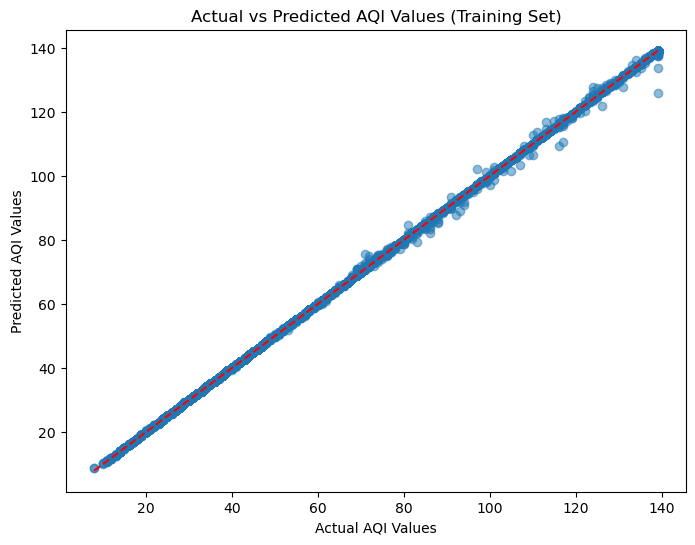

Test Set Evaluation:
MAE: 0.06
R2 Score: 1.00
----------------------------------------


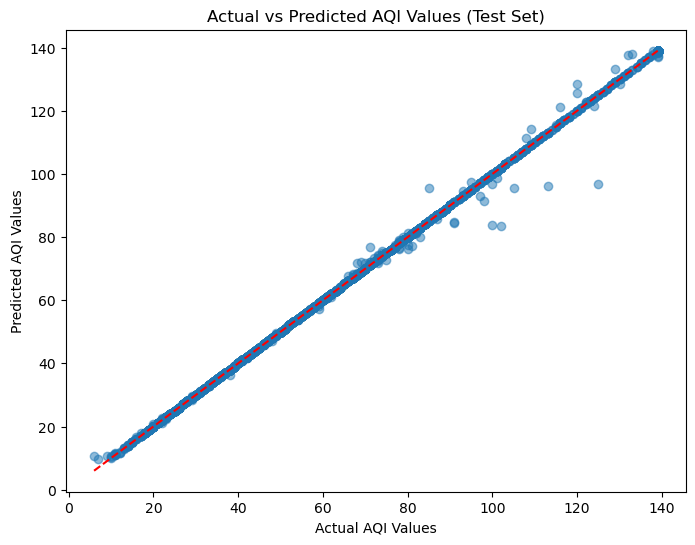

In [63]:
# Evaluation
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-" * 40)
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--r')
    plt.xlabel('Actual AQI Values')
    plt.ylabel('Predicted AQI Values')
    plt.title(f'Actual vs Predicted AQI Values ({dataset_name})')
    plt.show()

evaluate_model(y_train, train_preds, "Training Set")
evaluate_model(y_test, test_preds, "Test Set")

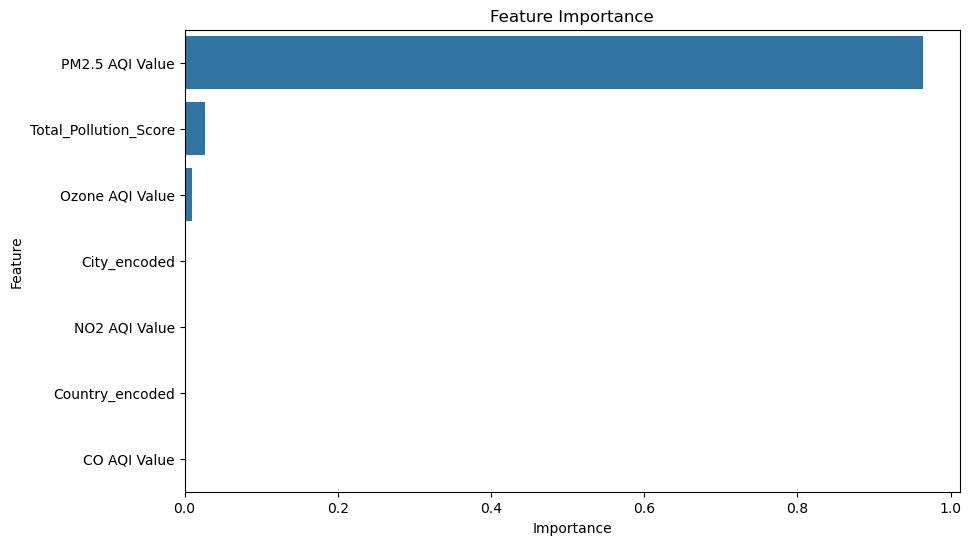

In [64]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

# Step 7: Hyperparameter Tuning

In [65]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error'
)

In [67]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [68]:
# Best model
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Optimized Training Set Evaluation:
MAE: 0.02
R2 Score: 1.00
----------------------------------------


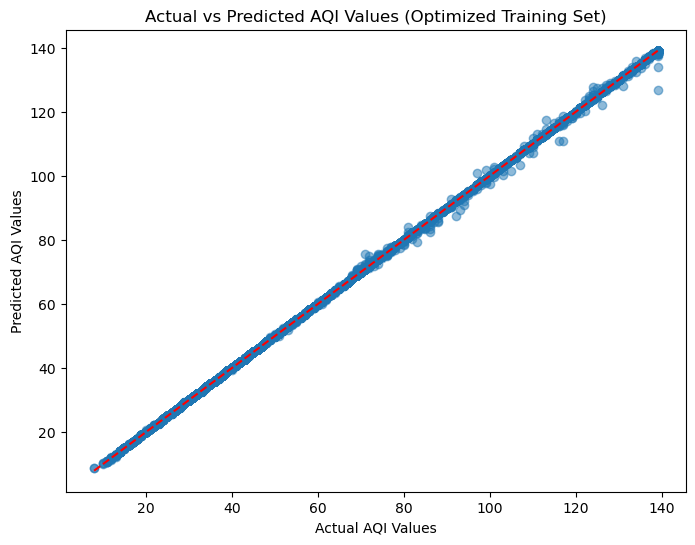

Optimized Test Set Evaluation:
MAE: 0.06
R2 Score: 1.00
----------------------------------------


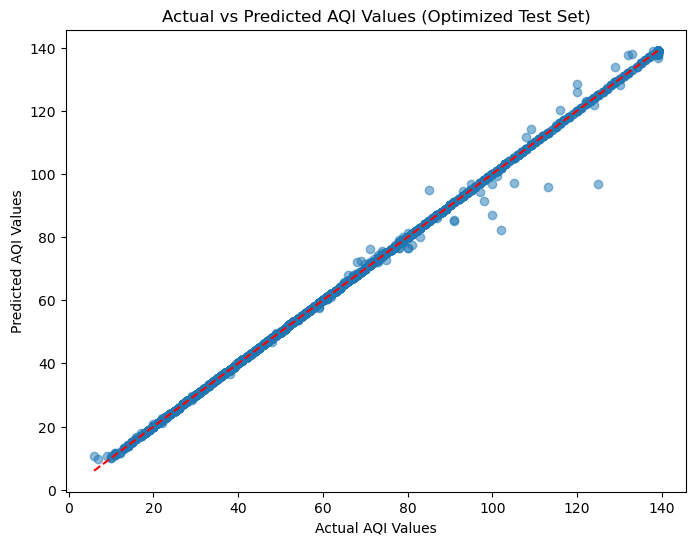

In [69]:
# Evaluate best model
best_train_preds = best_rf.predict(X_train)
best_test_preds = best_rf.predict(X_test)

evaluate_model(y_train, best_train_preds, "Optimized Training Set")
evaluate_model(y_test, best_test_preds, "Optimized Test Set")

## Step 8: Save the Best Model and Components

In [70]:
# Save the best model
joblib.dump(best_rf, 'best_air_quality_model.joblib')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.joblib')

# Save the preprocessing information (like median values if needed)
preprocessing_info = {
    'aqi_category_mapping': aqi_category_mapping,
    'numerical_columns': numerical_cols,
    'features': features
}
joblib.dump(preprocessing_info, 'preprocessing_info.joblib')

print("Model and preprocessing components saved successfully!")

Model and preprocessing components saved successfully!


In [72]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_encoded,CO AQI Category_encoded,Ozone AQI Category_encoded,NO2 AQI Category_encoded,PM2.5 AQI Category_encoded,Total_Pollution_Score,Country_encoded,City_encoded
0,Russian Federation,Praskoveya,51.0,1.0,36.0,0.0,51.0,1,0,0,0,1,24.50,130,16525
1,Brazil,Presidente Dutra,41.0,1.0,5.0,1.0,41.0,0,0,0,0,0,14.00,22,16546
2,Italy,Priolo Gargallo,66.0,1.0,39.0,2.0,66.0,1,0,0,0,1,30.25,75,16582
3,Poland,Przasnysz,34.0,1.0,34.0,0.0,20.0,0,0,0,0,0,14.70,123,16618
4,France,Punaauia,22.0,1.0,22.0,0.0,6.0,0,0,0,0,0,7.30,54,16699


In [73]:
df.to_csv('cleaned_air_pollution.csv', index=False)